# E-commerce Data - Sales Analysis And Customer Segmentation

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_excel('FinalFDSPROJdata.xlsx',"main-sheet")
sf = pd.read_excel('FinalFDSPROJdata.xlsx',"Demographic")
df


,S.No.,online_or_store,Customer_id_,online_id,store_id,item_id_,item_desc,Category,Quantity_Ordered,Price_Each,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Order_Date.1,Unnamed: 25,Order_Time
0,1,online,1001,652052,3613876.0,44,34in Ultrawide LG Monitor,Monitor,1,139549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-11 12:55:00,NaN,2018-03-11 12:55:00
1,2,online,1001,819793,3325538.0,43,Realme Power Bank,Power Bank,1,1500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-27 00:00:00,NaN,2/27/2019 0:01:00
2,3,online,1001,718232,1715821.0,23,iPhone,Phone,1,65588,...,NaN,NaN,Exchange,Return count,NaN,NaN,NaN,2020-01-01 10:33:00,NaN,2020-01-01 10:33:00
3,4,store,1001,976785,2255363.0,18,27in FHD Sony Monitor,Monitor,1,43424,...,NaN,NaN,count =,0,NaN,NaN,NaN,2022-06-02 10:33:00,NaN,2022-06-02 10:33:00
4,5,store,1002,490925,2487622.0,13,Lightning Charging Cable,Cable,1,4022,...,NaN,NaN,0,NaN,NaN,Both null,NaN,2020-10-06 12:55:00,NaN,2020-10-06 12:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,481,online,1081,656977,3897204.0,36,Nikon Camera,Camera,1,32835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-17 12:55:00,NaN,10/17/2019 12:55:00
481,482,store,1081,744125,2080912.0,50,20in Panasonic Monitor,Monitor,1,28648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-28 00:01:00,NaN,4/28/2022 0:01:00
482,483,store,1081,546063,2493110.0,19,Canon Camera,Camera,1,41044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-02 10:33:00,NaN,2022-08-02 10:33:00
483,484,online,1081,951422,2150636.0,43,Realme Power Bank,Power Bank,1,1500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-04 00:01:00,NaN,2018-09-04 00:01:00


### Sales Calculation

In [13]:

df=pd.DataFrame(df)
Sales= df.Quantity_Ordered * df.Price_Each
df["Sales"]= Sales
df["Order_Date"] = pd.to_datetime(df["Order_Date"]) 


In [14]:
gk=df.groupby("item_desc")["Sales"].sum().reset_index()
gk


,item_desc,Sales
0,20in Panasonic Monitor,343776
1,27in FHD Sony Monitor,1997504
2,27in Samsung Gaming Monitor,442530
3,34in Ultrawide LG Monitor,976843
4,Ambrane Power Bank,57477
5,Apple Airpods,393036
6,Boat Wired Headphones,65000
7,Bose SoundSport Headphones,287144
8,Canon Camera,1682804
9,Google Phone,638144


Text(0.5, 1.0, 'Sales(in Millions) vs Items')

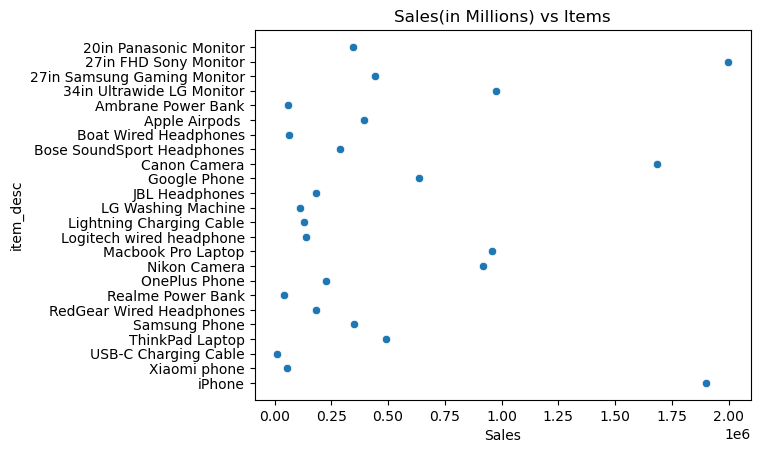

In [15]:
sns.scatterplot(data=gk, x="Sales", y="item_desc")
plt.title("Sales(in Millions) vs Items")

### Recency Calculation



In [16]:
df2 = df[['Order_Date','Customer_id_']].groupby('Customer_id_')['Order_Date'].agg('max').reset_index()

In [17]:
from datetime import timedelta
df2.columns = ['Customer_id_', 'Order_Date']
recent_date = df2['Order_Date'].max()+timedelta(days=1)
df2['Recency'] = df2['Order_Date'].apply(
    lambda x: (recent_date - x).days)
# df2 =df2[df2["Recency"]<365]
df2.reset_index(inplace=True)
df2.drop(['index'], axis=1, inplace=True)
df2.head()


,Customer_id_,Order_Date,Recency
0,1001,2022-06-02 10:33:00,201
1,1002,2021-09-11 00:01:00,466
2,1003,2020-09-13 00:00:00,829
3,1004,2022-01-30 00:00:00,325
4,1005,2022-11-04 12:55:00,46


### Monetary Calculation


In [18]:
df3=df.groupby(["Customer_id_"])[["Sales"]].sum()
df3.rename(columns = {'Sales':'Monetary'}, inplace = True)
df3.head()


,Monetary
Customer_id_,
1001,250061
1002,113235
1003,114072
1004,83649
1005,210610
